In [3]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from shapely.geometry import Point, Polygon
import geopandas as gpd

In [4]:
df = pd.read_csv('../data/viz/puma_costburden_rent_50ami.csv')

In [5]:
df.head(3)

,PUMA_id,pct_u50,pct_rent,pct_burd
0,400112,0.100312,0.198135,0.220939
1,400113,0.152055,0.287701,0.231524
2,400114,0.211015,0.397312,0.294311


## map percent below 50% AMI

In [4]:
# allow max rows and colums to be displayed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
geo = gpd.read_file('../data/geo/shapefiles/PUMAS.geojson')
#geo.head(2)

In [7]:
phx = gpd.read_file('../data/geo/shapefiles/phx.geojson')
villages = gpd.read_file('../data/geo/shapefiles/Villages.shp')
villages = villages.to_crs(4269)
road = gpd.read_file('../data/geo/shapefiles/maricopa_primroads.geojson')
road = road.to_crs(4269)
mask = gpd.read_file('../data/geo/shapefiles/PUMAS_mask.geojson')

### join data to geo files

In [9]:
df = pd.merge(geo,df,how='left',left_on='joinid',right_on='PUMA_id')

In [10]:
df.head(2)

,STATEFP20,PUMACE20,GEOID20,NAMELSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,joinid,geometry,PUMA_id,pct_u50,pct_rent,pct_burd
0,04,00129,0400129,Phoenix (Far North) & Peoria (Northwest) Citie...,G6120,S,654040399,3894959,+33.8457815,-112.1641828,400129,"MULTIPOLYGON (((-112.04763 33.71469, -112.0475...",400129,0.100504,0.163405,0.186538
1,04,00112,0400112,"Maricopa County--Scottsdale (North), Phoenix (...",G6120,S,608391353,434248,+33.7670066,-111.9328706,400112,"MULTIPOLYGON (((-111.78744 33.68347, -111.7874...",400112,0.100312,0.198135,0.220939


In [11]:
df.describe()

,ALAND20,AWATER20,joinid,PUMA_id,pct_u50,pct_rent,pct_burd
count,1.500000e+01,1.500000e+01,15.000000,15.000000,15.000000,15.000000,15.000000
mean,1.500315e+08,4.751324e+05,400119.466667,400119.466667,0.207665,0.374925,0.278352
std,1.990223e+08,9.764382e+05,5.235411,5.235411,0.070765,0.139606,0.059255
min,3.348861e+07,2.684700e+04,400112.000000,400112.000000,0.100312,0.163405,0.186538
25%,5.061796e+07,7.029600e+04,400115.500000,400115.500000,0.149890,0.288391,0.226231
50%,7.508780e+07,1.879480e+05,400119.000000,400119.000000,0.218101,0.364979,0.278135
75%,1.181456e+08,3.115855e+05,400122.500000,400122.500000,0.266167,0.449267,0.312475
max,6.540404e+08,3.894959e+06,400129.000000,400129.000000,0.308067,0.681321,0.376017


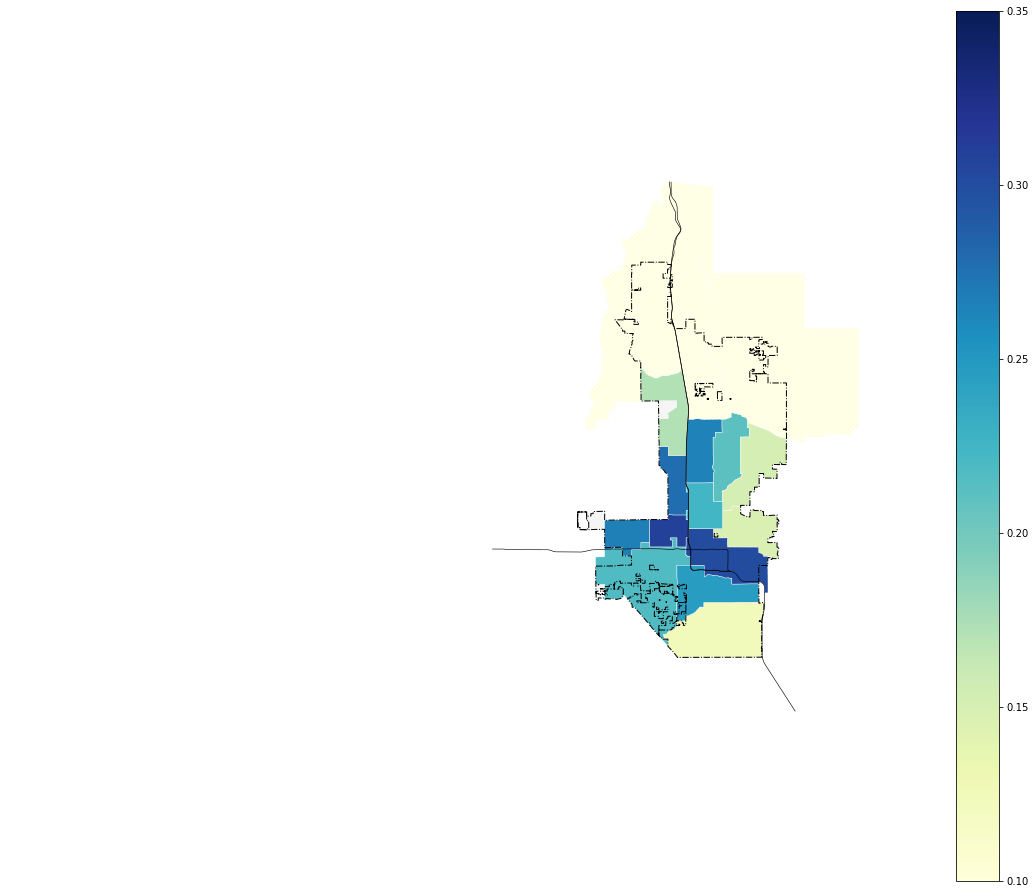

In [19]:
# percent under 50% AMI
fig, ax = plt.subplots(1, figsize = (20,16))
ax.axis('off')
new_norm = plt.Normalize(vmin=0.10,vmax=0.35)
sm = plt.cm.ScalarMappable(cmap='YlGnBu', norm=new_norm)
sm.set_array([])
phx.plot(ax=ax,color='whitesmoke',edgecolor='black',linewidth=0)
df.plot(column = 'pct_u50', cmap='YlGnBu', norm=new_norm, edgecolor="white", linewidth=0.4, ax=ax)
mask.plot(ax=ax,color='none',edgecolor='white',linewidth=0.1,hatch='//////')
#villages.plot(ax=ax,color='none',edgecolor='white',linewidth=0.4,linestyle='dashed')
phx.plot(ax=ax,color='none',edgecolor='black',linewidth=1.0,linestyle='dashdot')
road.plot(ax=ax,color='black',edgecolor='black',linewidth=0.6)
fig.colorbar(sm)
plt.savefig('img/pct_u50AMI_ylgnbu.jpg', dpi = 300) # saving each plot

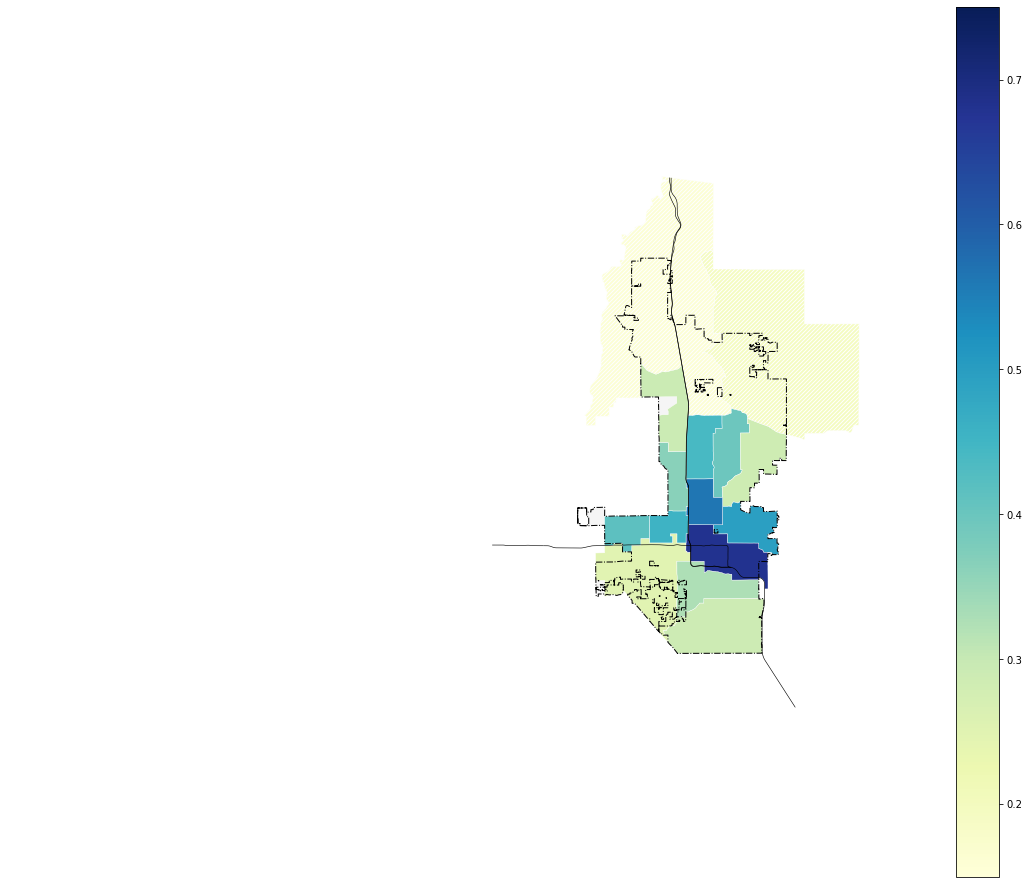

In [18]:
# percent renter
fig, ax = plt.subplots(1, figsize = (20,16))
ax.axis('off')
new_norm = plt.Normalize(vmin=0.15,vmax=0.75)
sm = plt.cm.ScalarMappable(cmap='YlGnBu', norm=new_norm)
sm.set_array([])
phx.plot(ax=ax,color='whitesmoke',edgecolor='black',linewidth=0)
df.plot(column = 'pct_rent', cmap='YlGnBu', norm=new_norm, edgecolor="white", linewidth=0.4, ax=ax)
mask.plot(ax=ax,color='none',edgecolor='white',linewidth=0.1,hatch='//////')
#villages.plot(ax=ax,color='none',edgecolor='white',linewidth=0.4,linestyle='dashed')
phx.plot(ax=ax,color='none',edgecolor='black',linewidth=1.0,linestyle='dashdot')
road.plot(ax=ax,color='black',edgecolor='black',linewidth=0.6)
fig.colorbar(sm)
plt.savefig('img/pct_rent_ylgnbu.jpg', dpi = 300) # saving each plot

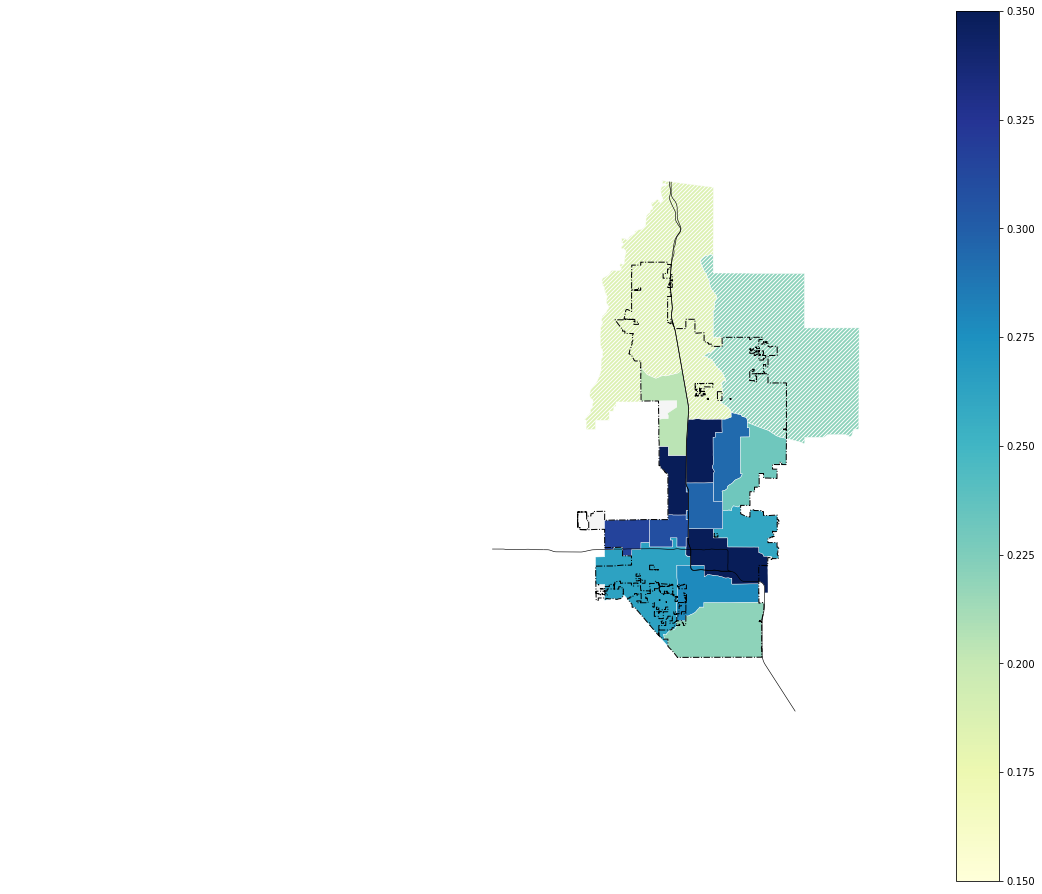

In [21]:
# percent under cost burdened
fig, ax = plt.subplots(1, figsize = (20,16))
ax.axis('off')
new_norm = plt.Normalize(vmin=0.15,vmax=0.35)
sm = plt.cm.ScalarMappable(cmap='YlGnBu', norm=new_norm)
sm.set_array([])
phx.plot(ax=ax,color='whitesmoke',edgecolor='black',linewidth=0)
df.plot(column = 'pct_burd', cmap='YlGnBu', norm=new_norm, edgecolor="white", linewidth=0.4, ax=ax)
mask.plot(ax=ax,color='none',edgecolor='white',linewidth=0.1,hatch='//////')
#villages.plot(ax=ax,color='none',edgecolor='white',linewidth=0.4,linestyle='dashed')
phx.plot(ax=ax,color='none',edgecolor='black',linewidth=1.0,linestyle='dashdot')
road.plot(ax=ax,color='black',edgecolor='black',linewidth=0.6)
fig.colorbar(sm)
plt.savefig('img/pct_costburd_ylgnbu.jpg', dpi = 300) # saving each plot